<a href="https://colab.research.google.com/github/DanaHa90321/Dana/blob/main/Real_estate_prediction_DD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No                         414 non-null    int64  
 1   Transaction_Date           414 non-null    float64
 2   House_Age                  414 non-null    float64
 3   Distance_to_MRT            414 non-null    float64
 4   Number_of_Stores           414 non-null    int64  
 5   Latitude                   414 non-null    float64
 6   Longitude                  414 non-null    float64
 7   House_Price_per_Unit_Area  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
               No  Transaction_Date   House_Age  Distance_to_MRT  \
count  414.000000        414.000000  414.000000       414.000000   
mean   207.500000       2013.148971   17.712560      1083.885689   
std    119.655756          0.281967   11.392485      1262.109595   
min     

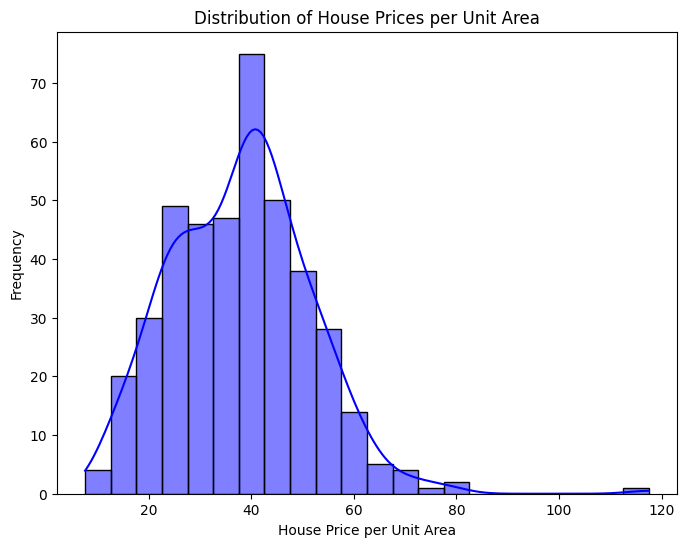

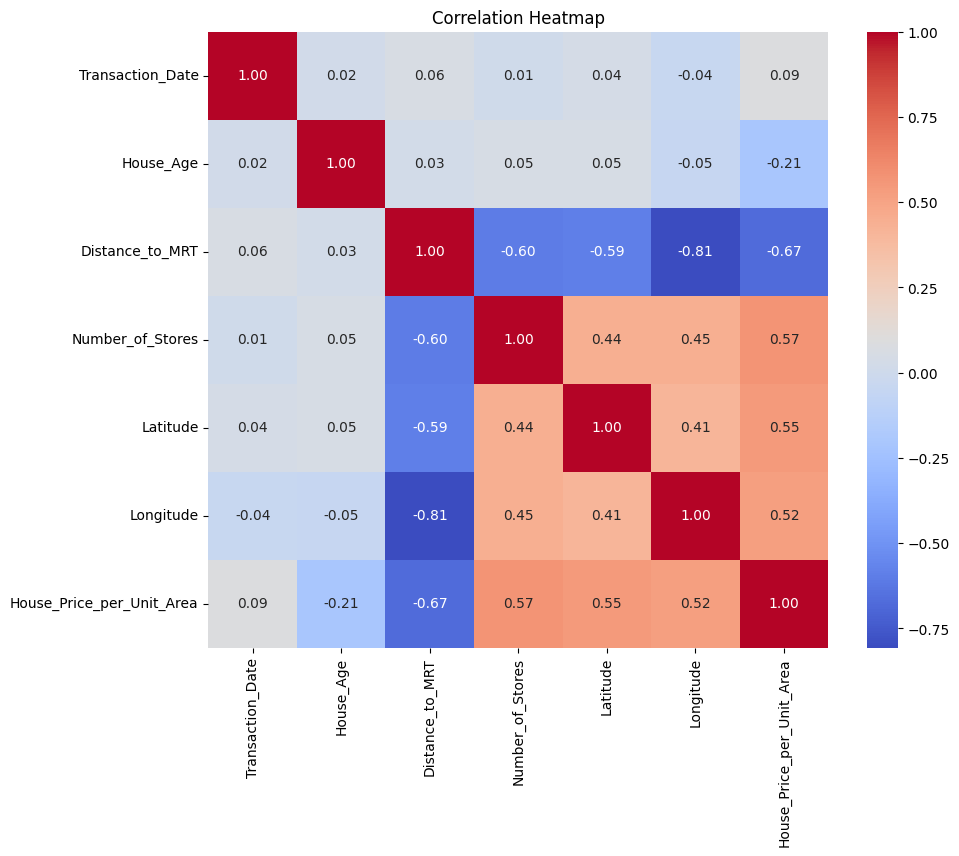

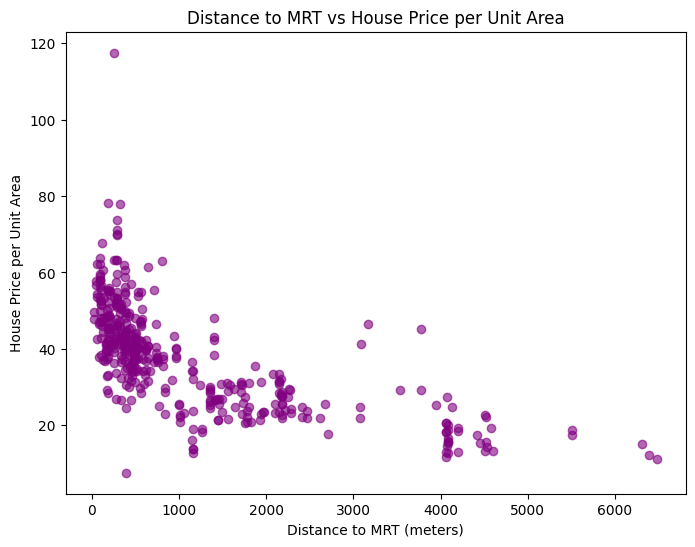

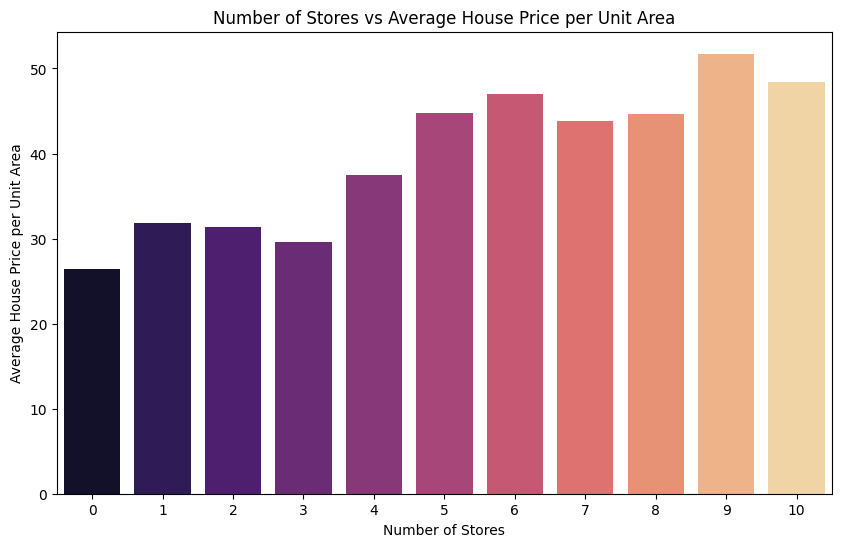

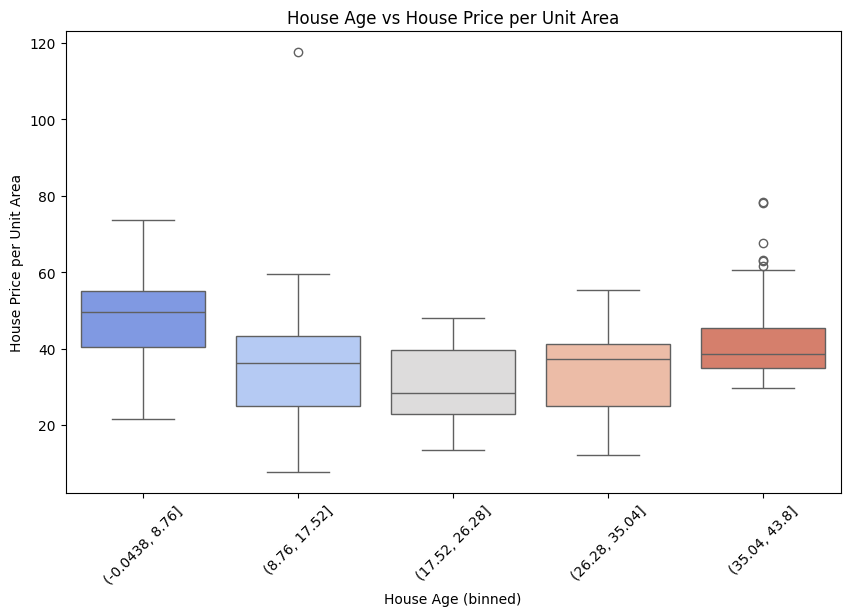

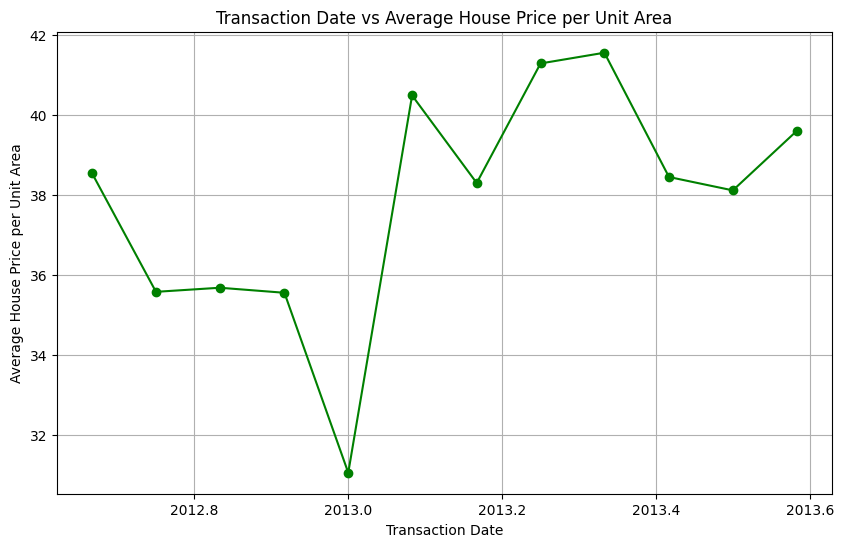

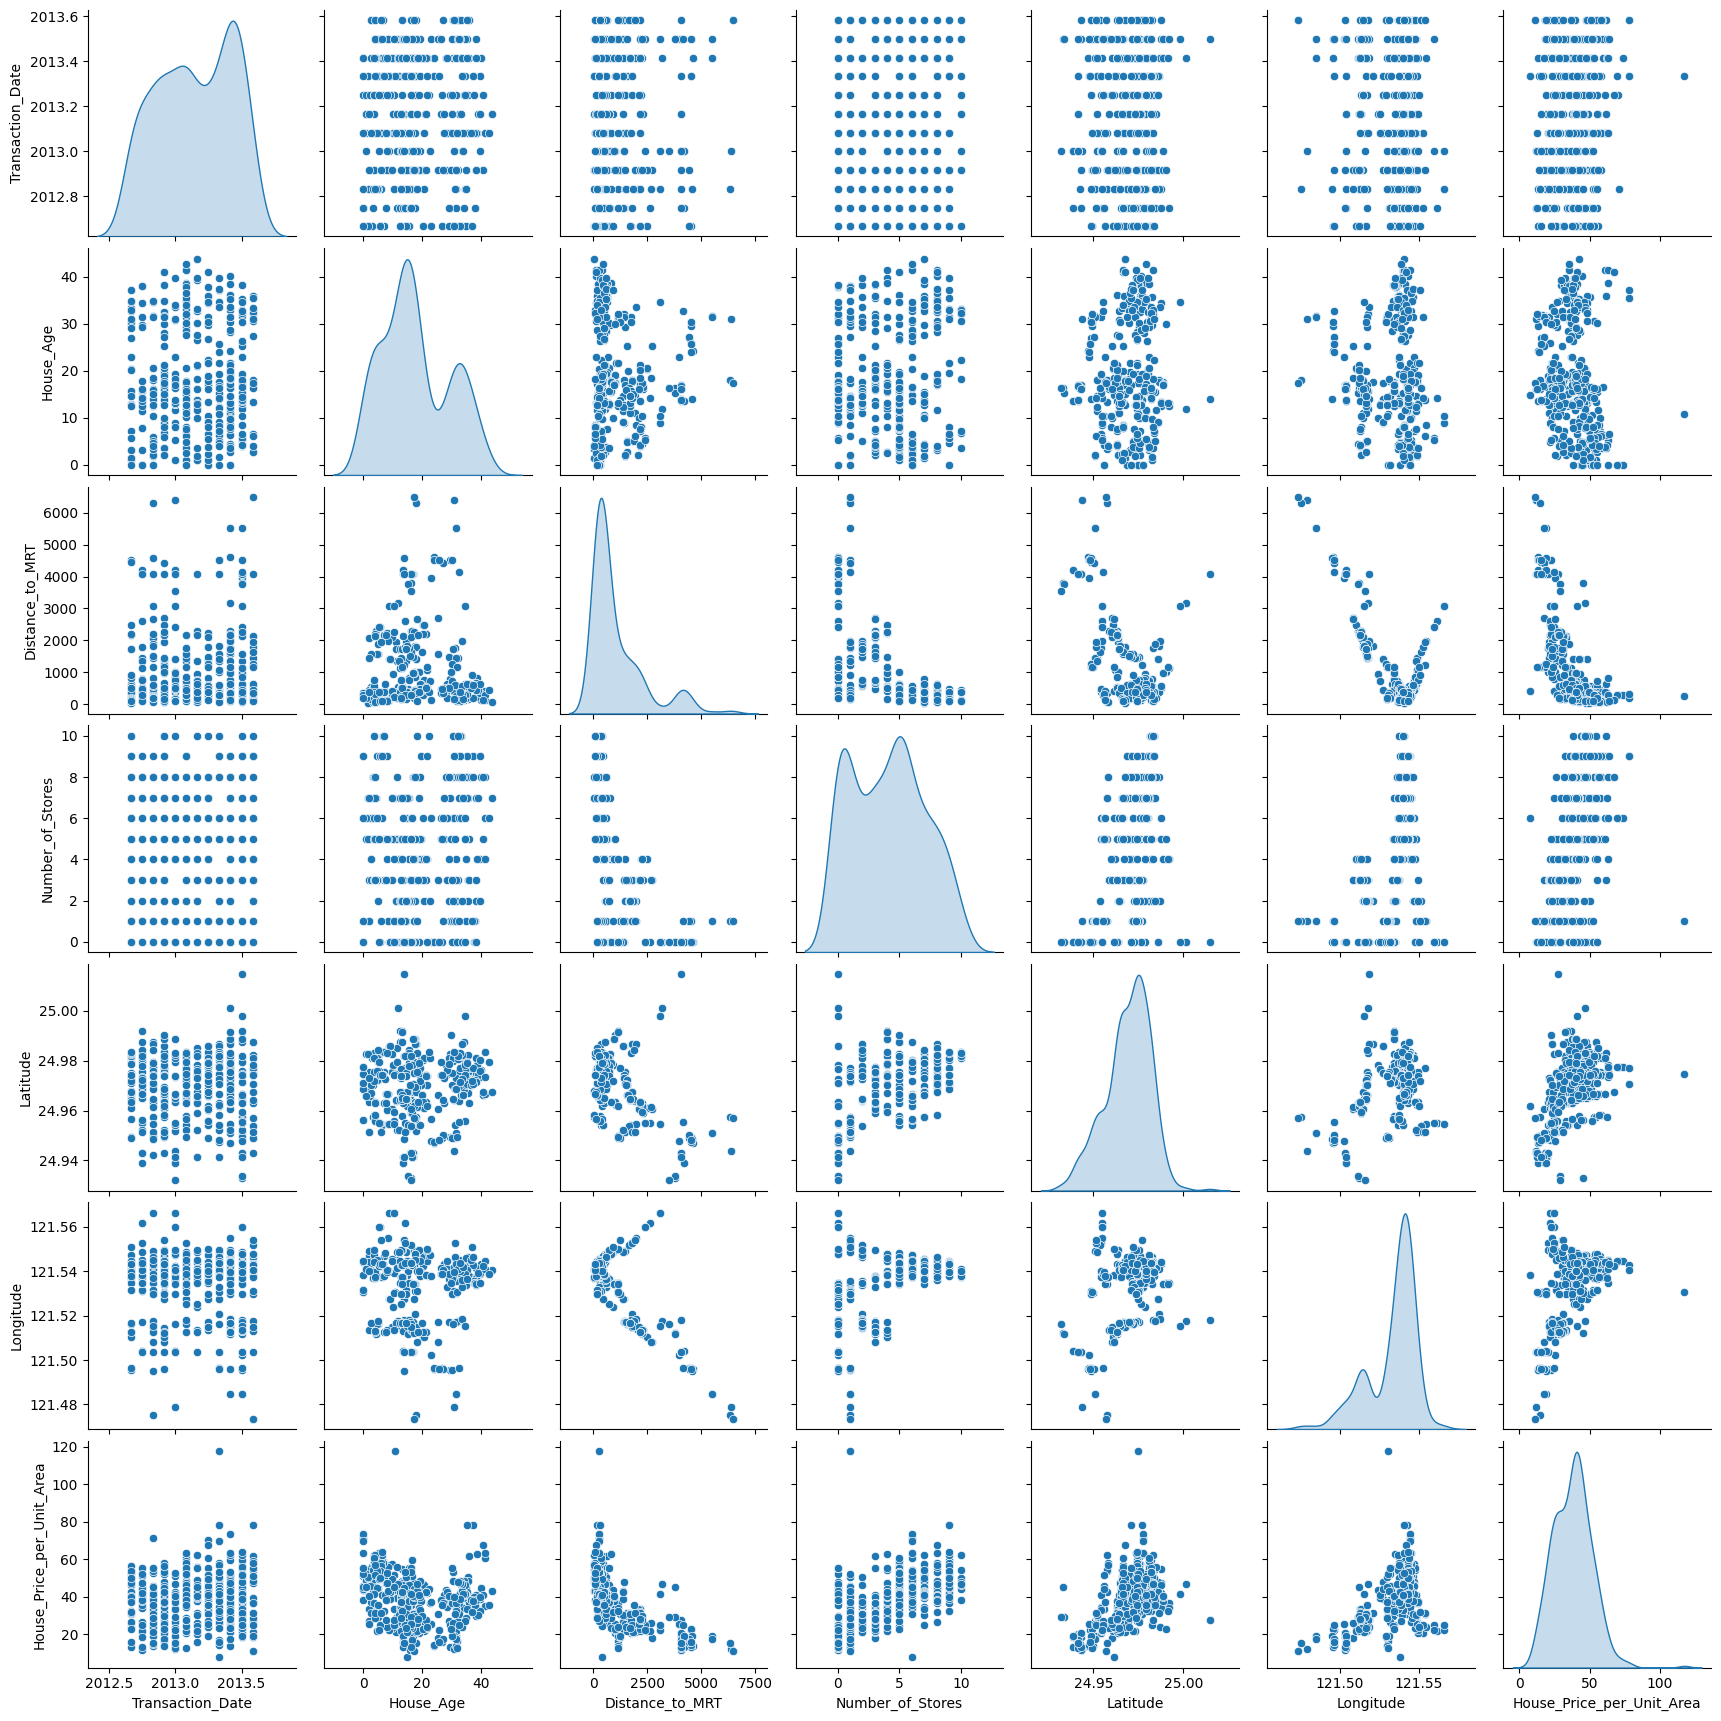

NameError: name 'mean_absolute_error' is not defined

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)

# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression



# Import train_test_split
from sklearn.model_selection import train_test_split # Import the necessary function

df1 = pd.read_csv('/content/Real estate.csv')

# Rename columns for easier understanding
df1.columns = [
    'No', 'Transaction_Date', 'House_Age', 'Distance_to_MRT',
    'Number_of_Stores', 'Latitude', 'Longitude', 'House_Price_per_Unit_Area'
]

# Display basic information about the dataset
print(df1.info())
print(df1.describe())

# Drop unnecessary columns if needed (e.g., 'No')
df1= df1.drop('No', axis=1)

# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df1['House_Price_per_Unit_Area'], kde=True, color='blue')
plt.title('Distribution of House Prices per Unit Area')
plt.xlabel('House Price per Unit Area')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Distance to MRT vs House Price
plt.figure(figsize=(8, 6))
plt.scatter(df1['Distance_to_MRT'], df1['House_Price_per_Unit_Area'], alpha=0.6, color='purple')
plt.title('Distance to MRT vs House Price per Unit Area')
plt.xlabel('Distance to MRT (meters)')
plt.ylabel('House Price per Unit Area')
plt.show()

# Bar plot: Number of Stores vs Average House Price
stores_vs_price = df1.groupby('Number_of_Stores')['House_Price_per_Unit_Area'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Stores', y='House_Price_per_Unit_Area', data=stores_vs_price, palette='magma')
plt.title('Number of Stores vs Average House Price per Unit Area')
plt.xlabel('Number of Stores')
plt.ylabel('Average House Price per Unit Area')
plt.show()

# Box plot: House Age vs House Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df1['House_Age'], bins=5), y='House_Price_per_Unit_Area', data=df1, palette='coolwarm')
plt.title('House Age vs House Price per Unit Area')
plt.xlabel('House Age (binned)')
plt.ylabel('House Price per Unit Area')
plt.xticks(rotation=45)
plt.show()

# Line plot: Transaction Date vs Average House Price
date_vs_price = df1.groupby('Transaction_Date')['House_Price_per_Unit_Area'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(date_vs_price['Transaction_Date'], date_vs_price['House_Price_per_Unit_Area'], marker='o', linestyle='-', color='green')
plt.title('Transaction Date vs Average House Price per Unit Area')
plt.xlabel('Transaction Date')
plt.ylabel('Average House Price per Unit Area')
plt.grid()
plt.show()


# Pairplot for feature relationships
sns.pairplot(df1, diag_kind='kde')
plt.show()

# Split the dataset into features (X) and target (y)
X = df1.drop('House_Price_per_Unit_Area', axis=1)
y = df1['House_Price_per_Unit_Area']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

# Feature importance visualization (for linear regression coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()
